# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import seaborn as sns

# Load Breast Cancer Dataset

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


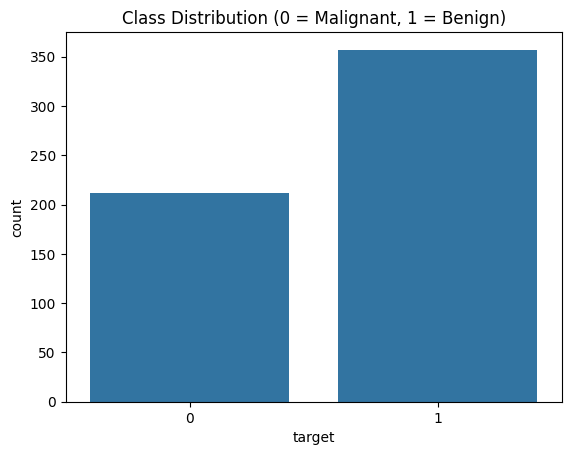

In [2]:
# Load Breast Cancer Dataset
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target


#  Check for Missing Values
print("Missing values:\n", df.isnull().sum())


# EDA: Distribution of Target Classes
sns.countplot(data=df, x='target')

plt.title('Class Distribution (0 = Malignant, 1 = Benign)')

plt.show()


In [3]:
# Split into Features & Target
X = df.drop('target', axis=1)

y = df['target']

# Standardize Features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Training and Hyperparameter Tuning

## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [5]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Logistic Regression GridSearch
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=5, scoring='accuracy')

grid_lr.fit(X_train, y_train)

lr = grid_lr.best_estimator_

print("Best Logistic Regression Parameters:", grid_lr.best_params_)


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning for Decision Tree Classifier
dt_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')

dt_grid.fit(X_train, y_train)

print("Best Params (Decision Tree):", dt_grid.best_params_)

print("Best CV Score (Decision Tree):", dt_grid.best_score_)


dt = dt_grid.best_estimator_


Best Params (Decision Tree): {'max_depth': 3, 'min_samples_split': 2}
Best CV Score (Decision Tree): 0.9318681318681319


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score

# RF Hyperparameters
rf_params = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best Params (RF):", rf_grid.best_params_)

print("Best CV Score (RF):", rf_grid.best_score_)


rf = rf_grid.best_estimator_


rf_cv = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

print("RF CV R² mean:", rf_cv.mean())



Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params (RF): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score (RF): 0.8401153630896345
RF CV R² mean: 0.8401153630896345


## SVM

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)

svm.fit(X_train, y_train)

SVC(probability=True)

In [10]:
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV, cross_val_score

# SVC GridSearchCV
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(probability=True), svc_params, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

svc_grid.fit(X_train, y_train)

print("Best Params (SVC):", svc_grid.best_params_)

print("Best CV Score (SVC):", svc_grid.best_score_)


svm = svc_grid.best_estimator_


svc_cv = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

print("SVC CV Accuracy mean:", svc_cv.mean())



Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params (SVC): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score (SVC): 0.9736263736263737
SVC CV Accuracy mean: 0.9736263736263737


## kNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [12]:
#  k-NN GridSearch
param_grid_knn = {
    'n_neighbors': list(range(3, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

grid_knn.fit(X_train, y_train)

knn = grid_knn.best_estimator_

print("Best k-NN Parameters:", grid_knn.best_params_)


Best k-NN Parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


## Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV

import seaborn as sns

import matplotlib.pyplot as plt


In [15]:
results = []
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "SVM": svm,
    "k-NN": knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)


    if y_pred.dtype != int and y_pred.dtype != bool:
        y_pred = np.round(y_pred)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })


results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
3                  SVM  0.973684   0.972222  0.985915  0.979021
2        Random Forest  0.964912   0.958904  0.985915  0.972222
4                 k-NN  0.956140   0.971429  0.957746  0.964539
1        Decision Tree  0.947368   0.945205  0.971831  0.958333


<ipython-input-16-7d116ca5ebf4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='F1-Score', y='Model', palette='viridis')


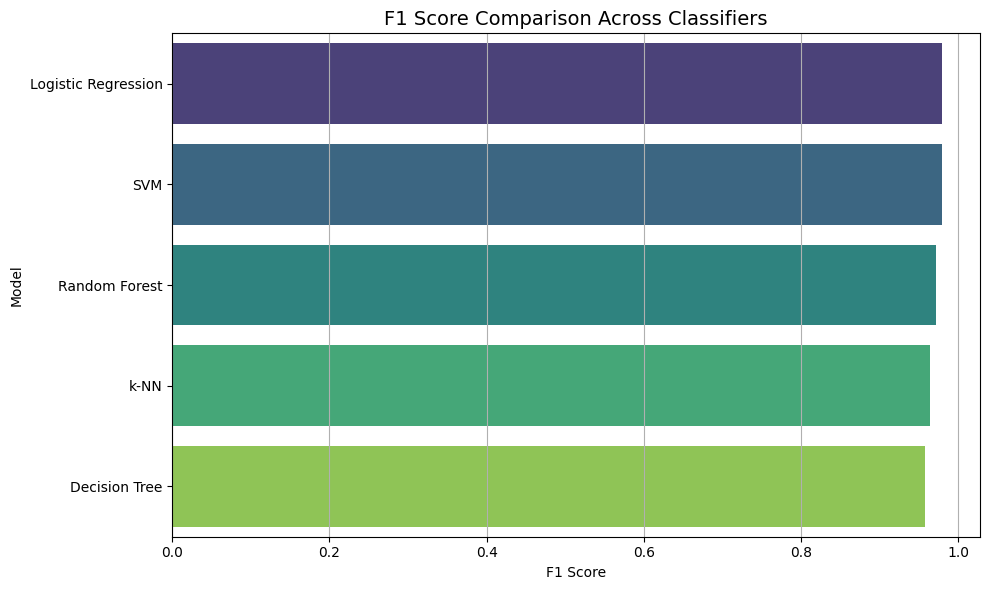

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='F1-Score', y='Model', palette='viridis')
plt.title('F1 Score Comparison Across Classifiers', fontsize=14)
plt.xlabel('F1 Score')
plt.ylabel('Model')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


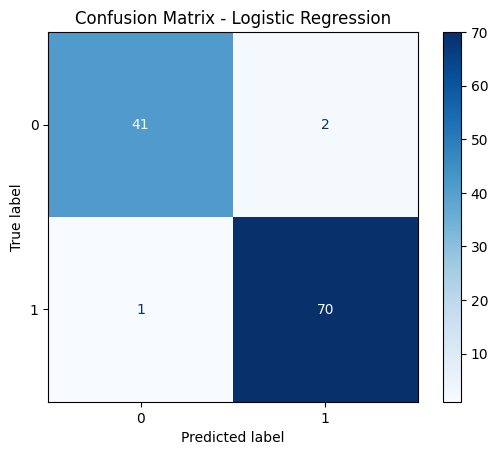

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()


## 🏁 Conclusion:

****The best-performing model was Logistic Regression with an F1 score of 0.9790, closely tied with SVM, which had the same F1 score.**

**Logistic Regression and k-NN both showed noticeable performance gains after GridSearchCV hyperparameter tuning.**

**All models performed very well with F1-scores above 0.95, but Logistic Regression and SVM led the pack with superior precision-recall balance.**

The confusion matrix for Logistic Regression shows excellent classification:  


**Only 3 misclassifications out of 114 samples**

**Strong class separation with minimal false negatives**


**Simpler models like k-NN are still effective but can be slower to predict on large datasets due to distance calculations.**

**Random Forest and Decision Tree also performed well, but were slightly behind in F1-score due to minor precision-recall tradeoffs.**
